load Dataset

In [3]:
import pandas as pd
data=pd.read_csv('p_wave_ttf_realistic_14000.csv')
data.head(12)

,sensor_reading,noise_level,rolling_avg,reading_diff,pga,snr,p_wave_detected,ttf_seconds
0,2.781778,1.009421,1.526190,2.177378,3.339793,1.208865,0,0.000000
1,3.559116,0.837625,2.058127,2.898023,1.964647,1.788792,1,12.333701
2,0.748205,1.302804,0.884253,-0.233246,1.591029,0.575389,0,0.000000
3,0.183283,0.901537,0.228616,-0.246274,0.427228,0.355826,0,0.000000
4,1.127213,1.041346,2.428188,-2.431903,1.185136,1.062081,1,12.224817
5,0.681546,0.906973,0.206146,0.619560,1.519266,0.612906,1,15.728268
6,0.258481,1.089385,0.572267,-0.565216,1.653077,0.481798,0,0.000000
7,0.227590,0.882737,0.088631,0.044308,0.000000,0.358740,0,0.000000
8,0.000000,1.521136,0.137303,-0.190580,0.276036,0.228480,0,0.000000
9,0.222956,1.108145,1.559367,-2.558822,1.970126,0.000000,0,0.000000


In [5]:
data.isnull().any()

sensor_reading     False
noise_level        False
rolling_avg        False
reading_diff       False
pga                False
snr                False
p_wave_detected    False
ttf_seconds        False
dtype: bool

In [7]:
data['ttf_seconds']=data['ttf_seconds'].astype(int)
data.head(3)

,sensor_reading,noise_level,rolling_avg,reading_diff,pga,snr,p_wave_detected,ttf_seconds
0,2.781778,1.009421,1.526190,2.177378,3.339793,1.208865,0,0
1,3.559116,0.837625,2.058127,2.898023,1.964647,1.788792,1,12
2,0.748205,1.302804,0.884253,-0.233246,1.591029,0.575389,0,0


In [9]:
data=data.round(2)
data.head(5)

,sensor_reading,noise_level,rolling_avg,reading_diff,pga,snr,p_wave_detected,ttf_seconds
0,2.78,1.01,1.53,2.18,3.34,1.21,0,0
1,3.56,0.84,2.06,2.90,1.96,1.79,1,12
2,0.75,1.30,0.88,-0.23,1.59,0.58,0,0
3,0.18,0.90,0.23,-0.25,0.43,0.36,0,0
4,1.13,1.04,2.43,-2.43,1.19,1.06,1,12


In [10]:
data.to_csv('cleaned_dataset.csv' , index=False , header=True)

Check for Multicollinearity

<Axes: >

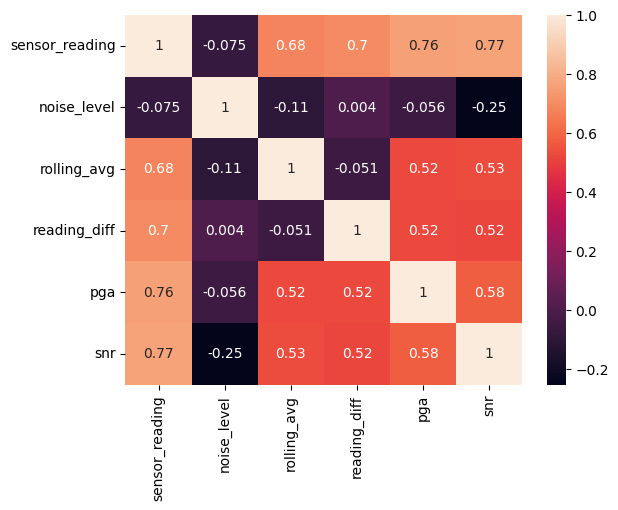

In [11]:
independent_data=data.drop(columns=['ttf_seconds','p_wave_detected'],axis=1 )
d=independent_data.corr()
import seaborn as sns
sns.heatmap(d ,annot=True)


In [13]:
def correlation(dataset , threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)             
    return col_corr

column=correlation(independent_data , 0.75)

print(column)

{'snr', 'pga'}


In [8]:
import pandas as pd
data=pd.read_csv('p_wave_ttf_balanced_14000.csv')
data.head()

,sensor_reading,noise_level,rolling_avg,reading_diff,pga,snr,p_wave_detected,ttf_seconds
0,0.454488,0.986931,0.567780,-0.018269,0.038416,-3.113716,0,0.000000
1,-0.102821,0.634967,0.400036,0.068412,0.041178,-1.149340,0,0.000000
2,3.454614,0.278381,3.072030,0.239307,0.333070,16.439989,1,15.296451
3,0.348701,0.646067,0.887806,0.006671,-0.125994,8.722664,0,0.000000
4,4.929234,0.102874,4.737579,0.172024,0.739287,10.427908,1,16.257261


In [9]:
data['p_wave_detected'].value_counts()

p_wave_detected
0    7000
1    7000
Name: count, dtype: int64

In [10]:
data=data.round(2)
data.head()

,sensor_reading,noise_level,rolling_avg,reading_diff,pga,snr,p_wave_detected,ttf_seconds
0,0.45,0.99,0.57,-0.02,0.04,-3.11,0,0.00
1,-0.10,0.63,0.40,0.07,0.04,-1.15,0,0.00
2,3.45,0.28,3.07,0.24,0.33,16.44,1,15.30
3,0.35,0.65,0.89,0.01,-0.13,8.72,0,0.00
4,4.93,0.10,4.74,0.17,0.74,10.43,1,16.26


In [12]:
data.to_csv('dataset.csv', index=False ,header=True)

In [13]:
data['ttf_seconds']=data['ttf_seconds'].astype(int)

In [14]:
data.to_csv('dataset.csv', index=False ,header=True)